# Live oak introgression manuscript
## Notebook 2: RAxML phylogenetic analyses  


#### D. Eaton, A. Hipp, A. Gonzalez-Rodriguez & J. Cavender-Bares
##### contact: deren.eaton@yale.edu  

-----------------------   

In [5]:
%%bash
## create directories for data assembly
mkdir -p analysis_raxml
mkdir -p analysis_bucky/locs  ## Bucky analysis was not included in manuscript
mkdir -p figures/

----------------   

## RAxML analyses

Phylogenetic trees are inferred by maximum likelihood using raxml with bootstrap support inferred from 200 random starting trees. Input files are in phylip format containing concatenated RADseq loci output by PyRAD. 

In [ ]:
raxcmd = "raxmlHPC-PTHREADS-AVX -f a" +\
                               " -m GTRGAMMA"+\
                               " -N 200 -x 12345 -p 12345 -T 20 -o NI,HE "+\
                               " -w /home/deren/Documents/Oaks/Virentes/analysis_raxml/ "

In [ ]:
phy = "-s analysis_pyrad/outfiles/virentes_c85d6m4p5.phy -n virentes_m4p5"
stderr = ! $raxcmd $phy
phy = "-s analysis_pyrad/outfiles/virentes_c85d6m20p5.phy -n virentes_m20p5"
stderr = ! $raxcmd $phy

In [ ]:
phy = "-s analysis_pyrad/outfiles/MGV_c85d6m4p5.phy -n MGV_m4p5"
stderr = ! $raxcmd $phy
phy = "-s analysis_pyrad/outfiles/MGV_c85d6m16p5.phy -n MGV_m16p5"
stderr = ! $raxcmd $phy

In [ ]:
phy = "-s analysis_pyrad/outfiles/OS_c85d6m4p5.phy -n OS_m4p5"
stderr = ! $raxcmd $phy
phy = "-s analysis_pyrad/outfiles/OS_c85d6m13p5.phy -n OS_m13p5"
stderr = ! $raxcmd $phy

In [ ]:
phy = " -s analysis_pyrad/outfiles/FB_c85d6m4p5.phy -n FB_m4p5"
stderr = ! $raxcmd $phy
phy = " -s analysis_pyrad/outfiles/FB_c85d6m12p5.phy -n FB_m12p5"
stderr = ! $raxcmd $phy

In [ ]:
phy = " -s analysis_pyrad/outfiles/OSMGV_c85d6m4p5.phy -n OSMGV_m4p5"
stderr = ! $raxcmd $phy
phy = " -s analysis_pyrad/outfiles/OSMGV_c85d6m20p5.phy -n OSMGV_m20p5"
stderr = ! $raxcmd $phy

In [ ]:
phy = " -s analysis_pyrad/outfiles/FBMGV_c85d6m4p5.phy -n FBMGV_m4p5"
stderr = ! $raxcmd $phy
phy = " -s analysis_pyrad/outfiles/FBMGV_c85d6m20p5.phy -n FBMGV_m20p5"
stderr = ! $raxcmd $phy

In [ ]:
phy = " -s analysis_pyrad/outfiles/FBOS_c85d6m4p5.phy -n FBOS_m4p5"
stderr = ! $raxcmd $phy
phy = " -s analysis_pyrad/outfiles/FBOS_c85d6m16p5.phy -n FBOS_m16p5"
stderr = ! $raxcmd $phy

-----------------------   
## Assessing data/locus sharing in RAD data sets

In [1]:
import itertools
import ete2
import numpy as np
import pandas as pd
import glob
from collections import OrderedDict, Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## read in the two full-taxa data sets
infile4  = "analysis_pyrad/outfiles/virentes_c85d6m4p5.loci"
infile20 = "analysis_pyrad/outfiles/virentes_c85d6m20p5.loci"
loci4  = open(infile4).read().split("|\n")
loci20 = open(infile20).read().split("|\n")

## how many loci
nloci4 = len(loci4) 
nloci20 = len(loci20)

## read in a tree file for the order of tips
tree = ete2.Tree("analysis_raxml/RAxML_bipartitions.virentes_m4p5", format=2)

## sort names by their order in the tree
tree.ladderize()
names = [i.strip() for i in tree.iter_leaf_names()]

## create list of locus x sample
def create_array(nsamp, nloci, loci):
    lxs = np.zeros((nsamp, nloci))
    for loc in xrange(len(loci)):
        for seq in loci[loc].split("\n"):
            if ">" in seq:
                lxs[names.index(seq.split()[0].replace(">","")),loc] += 1
    return lxs

## create arrays for the two data sets
lxs1 = create_array(len(names), nloci4, loci4)
lxs2 = create_array(len(names), nloci20, loci20)

## empty matrix
share = np.zeros((len(names),len(names)))

For each column (locus) in lxs iterate over all pairs of samples and if both have data at that locus add 1 to their shared data in the matrix [share]. This fills the upper triangle of the matrix. I fill the lower triangle with shared data from the other data set. 

In [4]:
## fill matrix share above diagonal (Allmin20 data set)
for col in xrange(lxs2.shape[1]):
    for samp1,samp2 in itertools.combinations(names,2):
        if (lxs2[names.index(samp1),col] and lxs2[names.index(samp2),col]):
            share[names.index(samp1),names.index(samp2)] += 1

In [5]:
## fill matrix share below diagonal (Allmin4 data set)
for col in xrange(lxs1.shape[1]):
    for samp2,samp1 in itertools.combinations(names,2):
        if (lxs1[names.index(samp1),col] and lxs1[names.index(samp2),col]):
            share[names.index(samp1),names.index(samp2)] += 1

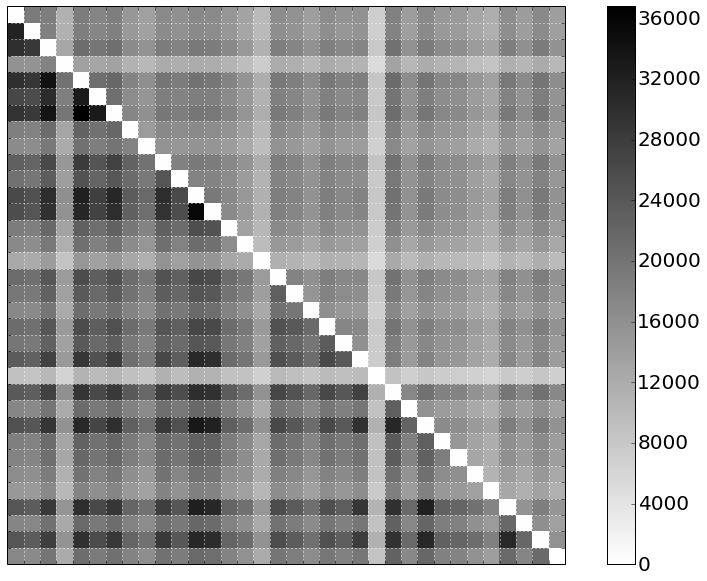

In [11]:
f,ax = plt.subplots(1,1, figsize=(15,10))
cax = ax.imshow(share, interpolation='none', cmap='gist_yarg')
ax.grid(True, color='white', lw=0.9)
ax.get_xaxis().set_ticks([i-0.5 for i in range(35)])
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticks([i-0.5 for i in range(35)])
ax.get_yaxis().set_ticklabels([])
cb = plt.colorbar(cax);
for t in cb.ax.get_yticklabels():
     t.set_fontsize(20)
f.savefig("figures/heatmap.svg")
f.savefig("figures/heatmap.png", dpi=300)

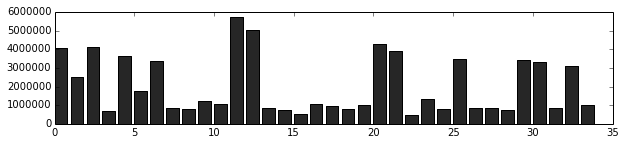

In [12]:
## get number of raw reads for each sample
with open("analysis_pyrad/stats/s2.rawedit.txt") as rawstat:
    raws = rawstat.readlines()
    
dat = [(line.split("\t")[0],int(line.split("\t")[-1].strip())) for \
       line in raws if "_" in line]

dat2 = OrderedDict()
for t in names:
    for j in dat:
        if t == j[0].split("_")[0]:
            if t not in dat2:
                dat2[t] = j[1]
            else:
                dat2[t] += j[1]
dat = pd.DataFrame({"raws":pd.Series(dat2)})

## make plot of raw reads
f, ax = plt.subplots(1,1, figsize=(10,2))
ax.bar(range(len(dat)),(dat.raws), color="#262626")
ax.grid('off')
f.savefig("figures/bars.svg")

------------------   

### Do mantel correlation tests

In [15]:
from skbio import DistanceMatrix
from skbio.stats.distance import mantel

In [13]:
## func to measure jaccard's distance
def jaccard(a, b):
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

#### Allmin4 data set

In [16]:
## write matrices to file for loading into R for mantel test
Pairs4 = OrderedDict()
for samp1,samp2 in itertools.product(names,repeat=2):
    if samp1 == samp2:
        Pairs4[str(samp1+"_"+samp2)] = [0.,0.,0.]
    else:    
        jaccar = jaccard(set([i for i in range(lxs1.shape[1]) if \
                   lxs1[:,i][names.index(samp1)] == 1.]),
                    set([i for i in range(lxs1.shape[1]) if \
                         lxs1[:,i][names.index(samp2)] == 1.]))
        meanraw = np.mean([dat.raws[samp1],dat.raws[samp2]])
        phydist = tree.get_distance(samp1,samp2)
        Pairs4[str(samp1+"_"+samp2)] = [jaccar,meanraw,phydist]

In [17]:
sharedist = DistanceMatrix(np.array([i[0] for i in Pairs4.values()]).reshape(34,34))
rawdist = DistanceMatrix(np.array([i[1] for i in Pairs4.values()]).reshape(34,34))
phydist = DistanceMatrix(np.array([round(i[2],7) for i in Pairs4.values()]).reshape(34,34))

In [24]:
coeff, p_value, n = mantel(sharedist, rawdist, 
                           method='spearman', 
                           permutations=9999,
                           alternative="two-sided")
print "shared loci ~ mean raw data"
print "coeff =",coeff
print "p-value =",p_value

shared loci ~ mean raw data
coeff = 0.372246206797
p-value = 0.0106


In [23]:
coeff, p_value, n = mantel(sharedist, phydist, 
                           method='spearman', 
                           permutations=9999,
                           alternative="two-sided")
print "shared loci ~ phylo dist"
print "coeff =",coeff
print "p-value =", p_value

shared loci ~ phylo dist
coeff = -0.144901236203
p-value = 0.2401


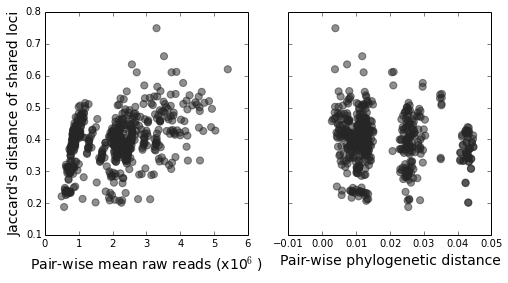

In [34]:
f,ax = plt.subplots(1,2, figsize=(8,4), sharey=True)

## remove values on the diagonal
r = rawdist.data[rawdist.data.nonzero()]
s = sharedist.data[sharedist.data.nonzero()]
p = phydist.data[phydist.data.nonzero()]

ax[0].scatter(r/1e6,s, color="#262626", alpha=0.3, s=50)
ax[1].scatter(p,s, color="#262626", alpha=0.3, s=50)

ax[0].set_ylabel("Jaccard's distance of shared loci", fontsize=14)
ax[0].set_xlabel("Pair-wise mean raw reads (x10$^6$)", fontsize=14)
ax[1].set_xlabel("Pair-wise phylogenetic distance", fontsize=14)

f.savefig("figures/rawVphylo_min4.png")
#f.savefig("figures/rawVphylo_min4.svg")

#### Allmin20 data set

In [43]:
## write matrices to file for loading into R for mantel test
Pairs20 = OrderedDict()
for samp1,samp2 in itertools.product(names,repeat=2):
    if samp1 == samp2:
        Pairs20[str(samp1+"_"+samp2)] = [0.,0.,0.]
    else:    
        jaccar = jaccard(set([i for i in range(lxs2.shape[1]) if \
                   lxs2[:,i][names.index(samp1)] == 1.]),
                    set([i for i in range(lxs2.shape[1]) if \
                         lxs2[:,i][names.index(samp2)] == 1.]))
        meanraw = np.mean([dat.raws[samp1],dat.raws[samp2]])
        phydist = tree.get_distance(samp1,samp2)
        Pairs20[str(samp1+"_"+samp2)] = [jaccar,meanraw,phydist]

In [56]:
sharedist20 = DistanceMatrix(np.array([i[0] for i in Pairs20.values()]).reshape(34,34))
rawdist20 = DistanceMatrix(np.array([i[1] for i in Pairs20.values()]).reshape(34,34))
phydist20 = DistanceMatrix(np.array([round(i[2],7) for i in Pairs20.values()]).reshape(34,34))

In [57]:
coeff, p_value, n = mantel(sharedist, rawdist, 
                           method='spearman', 
                           permutations=9999,
                           alternative="two-sided")
print "shared loci ~ mean raw data"
print "coeff =",coeff
print "p-value =",p_value

shared loci ~ mean raw data
coeff = 0.478713410308
p-value = 0.0028


In [58]:
coeff, p_value, n = mantel(sharedist, phydist, 
                           method='spearman', 
                           permutations=9999,
                           alternative="two-sided")
print "shared loci ~ phylo data"
print "coeff =",coeff
print "p-value =",p_value

shared loci ~ phylo data
coeff = 0.0869666708908
p-value = 0.5273


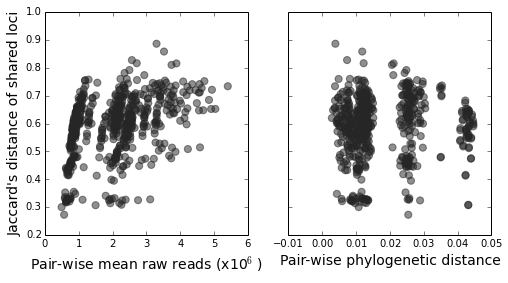

In [59]:
f,ax = plt.subplots(1,2, figsize=(8,4), sharey=True)

## remove values on the diagonal
r = rawdist20.data[rawdist.data.nonzero()]
s = sharedist20.data[sharedist.data.nonzero()]
p = phydist20.data[phydist.data.nonzero()]

ax[0].scatter(r/1e6,s, color="#262626", alpha=0.3, s=50)
ax[1].scatter(p,s, color="#262626", alpha=0.3, s=50)

ax[0].set_ylabel("Jaccard's distance of shared loci", fontsize=14)
ax[0].set_xlabel("Pair-wise mean raw reads (x10$^6$)", fontsize=14)
ax[1].set_xlabel("Pair-wise phylogenetic distance", fontsize=14)

f.savefig("figures/rawVphylo_min20.png")
#f.savefig("figures/rawVphylo.svg")

## BUCKy Analysis

In [5]:
## Dictionary to select one sample for each species

D = {"B":"BJSL25",
     "Ft":"TXMD3",
     "Fm":"MXED8",
     "O":"CRL0030",
     "S":"CUVN10",
     "V":"FLBA140",
     "G":"FLSF54",
     "M":"FLSF47",
     "out":"AR"}


#### Function to write loci as mrbayes readable .nex files

In [6]:
def nexmake(D, N, outg):
    outloc = open("analysis_bucky/locs/"+`N`+".nex", 'w')
    ## write header block
    outloc.write("#NEXUS\nbegin data;\n"+\
                 "dimensions ntax="+`len(D)`+" nchar="+`len(D.values()[0])`+";\n"+\
                 "format datatype=dna interleave=yes gap=-;\n"+\
                 "matrix\n\n")
    ## write sequence data for locus loc
    for i in D.items():
        outloc.write( i[0][0:9]+" "*(10-len(i[0][0:9]))+"".join(i[1])+"\n" )
    ## write mrbayes block
    outloc.write("\n\n    ;\nend;\n"+\
                 "\n\nbegin mrbayes;\n"+\
                 "set autoclose=yes nowarn=yes;\n"+\
                 "lset nst=2 rates=gamma;\n"+\
                 "outgroup "+outg+";\n"+\
                 "mcmc ngen=4000000 samplefreq=4000;\n"+\
                 "sump burnin=1000000;\n"+\
                 "sumt burnin=1000000;\n"+\
                 "end;")
    outloc.close()

#### Parse loci 

In [8]:
## In latter versions of pyrad one could use the
## .alleles data file ('a' output from pyrad)
infile = open("/home/deren/Documents/Oaks/Virentes/analysis_pyrad/outfiles/virentes_c85d6m4p5.loci").read()
loci = iter(infile.strip().split("|\n")[:])


def unstruct(amb):
    " returns bases from ambiguity code"
    D = {"R":["G","A"],
         "K":["G","T"],
         "S":["G","C"],
         "Y":["T","C"],
         "W":["T","A"],
         "M":["C","A"]}
    if amb in D:
        return D.get(amb)
    else:
        return [amb,amb]

def resolveambig(subseq):
    N = []
    for col in subseq:
        N.append([unstruct(i)[np.random.binomial(1,0.5)] for i in col])
    return np.array(N)
        

def PIS(seqsamp):
    ## check that locus is variable
    pis = sum([Counter(col).most_common(2)[1][1] > 1 for col in seqsamp.T \
               if len(Counter(col).most_common(2))>1])
    if pis >= 2:
        return pis
    else:
        return 0    

N = 0
## create subsampled data set
while 1:
    try: loc = loci.next().split("\n")[:-1]
    except StopIteration: break

    ## if all tip samples have data in this locus
    names = [i.split()[0].replace(">","") for i in loc]
    
    ## check that locus has required samples for each subtree
    if all([i in names for i in D.values()]):
        seqs = np.array([list(i.split()[1]) for i in loc])
        seqsamp = seqs[[names.index(tax) for tax in D.values()]]
        seqsamp = resolveambig(seqsamp)
        pis = PIS(seqsamp)    
        if pis:
            N += 1
            ## remove invariable columns given this subsampling
            keep = []
            for n,col in enumerate(seqsamp.T):
                if all([i not in ["N","-"] for i in col]):
                    keep.append(n)
            subseq = seqsamp.T[keep].T
            ## write to a nexus file
            DD = dict(zip(D.keys(), [i.tostring() for i in subseq]))
            nexmake(DD, N, "out")
print N, 'loci kept'

828 loci kept


### Create a client to run mrbayes over multiple processors

In [9]:
## create a Parallel computing client
## can map a function across how ever many 
## parallel engines are turned on in the notebook
## under the Clusters tab
from IPython.parallel import Client
PAR = Client()[:]
LOADBALANCE = Client().load_balanced_view()

### Create a list of input arguments

In [10]:
## list of arguments to function single_mb
args = []

## create a new dir for log files
! mkdir -p "analysis_bucky"/logs/

## get all nex files from this dir
files = glob.glob("analysis_bucky/locs/*.nex")

## put nex file as input and other as output location into args
for ff in files:
    num = ff.split("/")[-1]
    args.append([ff, "analysis_bucky/logs/log."+str(num)])
    
print '------\n',len(args), '\ttotal mrbayes analyses'

------
828 	total mrbayes analyses


In [11]:
## decorator adds parallel capability if run in IPython notebook
@LOADBALANCE.parallel(block=True)
def single_mb(arg):
    infile, outloc = arg
    ! mb "$infile" > "$outloc"

In [12]:
## run these jobs in parallel
quiet = single_mb.map(args)

### Run mbsum

In [ ]:
## create dir for bucky input files
! mkdir -p analysis_bucky/ins/

## iterate over dirs
K = glob.glob("analysis_bucky/locs/*.nex")
nums = [int(i.split("/")[-1].split('.nex')[0]) for i in K]

## combine trees from the two replicate runs
for n in range(1,max(nums)+1):
    cmd = """ -o analysis_bucky/ins/%d.in \
              analysis_bucky/locs/%d.nex.run1.t \
              analysis_bucky/locs/%d.nex.run2.t """ % (n,n,n)
    stderr = ! mbsum -n 101 $cmd

In [14]:
! bucky -h 

Bayesian Untangling of Concordance Knots (applied to yeast and other organisms)
BUCKy version 1.4.3, 9 Jul 2014
Copyright (C) 2006-2014 by Bret Larget and Cecile Ane and Riley Larget

This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Usage: bucky [options] <input files>

  Options:
  Parameter                      | Usage                      | Default Value
  -------------------------------------------------------------------
  alpha                          | -a number                  | 1
  # of runs                      | -k integer                 | 2
  # of MCMC updates              | -n integer                 | 100000
  # of chains                    | -c integer                 | 1
  MCMCMC Rate                    | -r integer                 | 100
  alpha multiplier               | -m number                  | 10
  subsample rate                 | -s integer                 |

In [ ]:
! bucky -a  1 -k 4 -c 4 -n 1000000 -o run1 analysis_bucky/ins/*

In [ ]:
! bucky -a  5 -k 4 -c 4 -n 1000000 -o run5 analysis_bucky/ins/*

In [ ]:
! bucky -a 20 -k 4 -c 4 -n 1000000 -o run20 analysis_bucky/ins/*

In [ ]:
! bucky --use-independence-prior -k 4 -n 1000000 -o runinf analysis_bucky/ins/*

In [19]:
! head -n 50 analysis_bucky/run1.concordance

translate
 1 B,
 2 Ft,
 3 G,
 4 M,
 5 O,
 6 S,
 7 V,
 8 Fm,
 9 out;

Population Tree:
((((1,8),2),((3,4),7)),(5,6),9);

Primary Concordance Tree Topology:
((1,(2,8)),(((3,4),7),(5,6)),9);

Population Tree, With Branch Lengths In Estimated Coalescent Units:
((((1:10.000,8:10.000):0.086,2:10.000):0.308,((3:10.000,4:10.000):0.086,7:10.000):0.245):0.023,(5:10.000,6:10.000):0.395,9:10.000);

Primary Concordance Tree with Sample Concordance Factors:
((1:1.000,(2:1.000,8:1.000):0.206):0.219,(((3:1.000,4:1.000):0.199,7:1.000):0.136,(5:1.000,6:1.000):0.371):0.103,9:1.000);

Four-way partitions in the Population Tree: sample-wide CF, coalescent units and Ties(if present)
{1,2,5,6,8,9; 7|3; 4}	0.388, 0.086,  
{1; 8|2; 3,4,5,6,7,9}	0.388, 0.086,  
{1,2,3,4,7,8; 9|5; 6}	0.551, 0.395,  
{1,2,8; 5,6,9|3,4; 7}	0.478, 0.245,  
{1,8; 2|3,4,7; 5,6,9}	0.510, 0.308,  
{1,2,8; 3,4,7|5,6; 9}	0.349, 0.023,  

Splits in the Primary Concordance Tree: sample-wide and genome-wide mean CF (95% credibility), SD of 

In [ ]:
! head -n 50 analysis_bucky/run5.concordance

In [ ]:
! head -n 50 analysis_bucky/run20.concordance

In [ ]:
! head -n 50 analysis_bucky/runinf.concordance

## R tree plots of all ML subtrees

In [4]:
%load_ext rmagic
## requires that the Python package Rpy2 is installed

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


#### Bucky trees

In [5]:
%%R
library(ape)

alpha1 = read.tree(text="((1,(2,8)),(((3,4),7),(5,6)),9);")
alpha5 = read.tree(text="((((1,8),2),((3,4),7)),(5,6),9);")
alpha20 = read.tree(text="(((1,8),2),(((3,4),7),(5,6)),9);")
alphainf = read.tree(text="(((((1,8),2),(5,6)),(3,4)),7,9);")

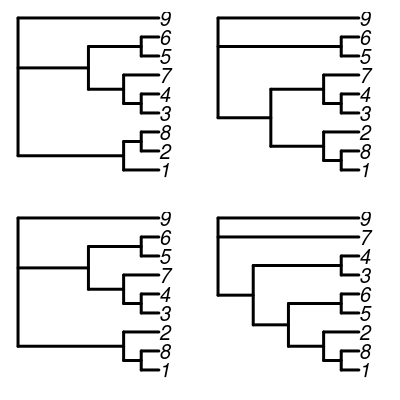

In [11]:
%%R -w 400 -h 400
par(mfrow=c(2,2),
    mar=c(2,1,1,2))
plot(alpha1, edge.width=4, cex=2, adj=0.1)
plot(alpha5, edge.width=4, cex=2, adj=0.1)
plot(alpha20, edge.width=4, cex=2, adj=0.1)
plot(alphainf, edge.width=4, cex=2, adj=0.1)

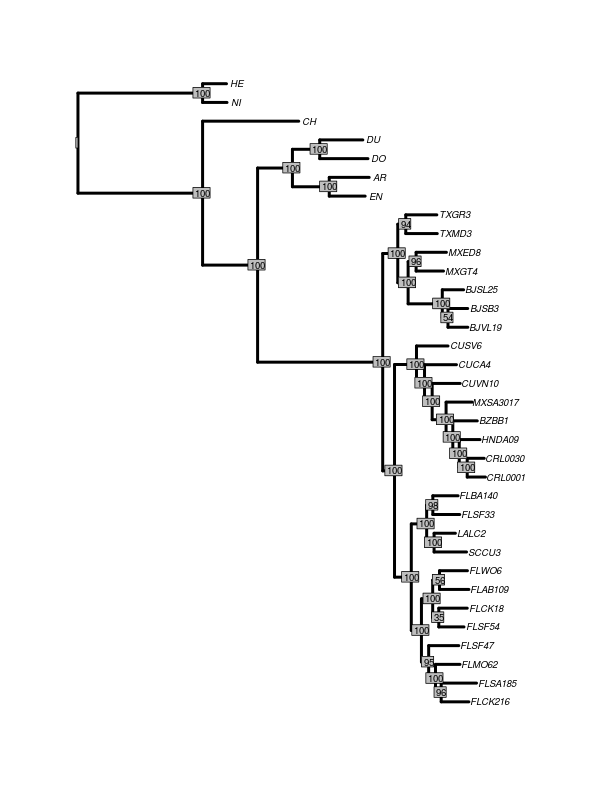

In [10]:
%%R -w 600 -h 800
library(ape)

## save figure
#svg("figures/tree_virentes_m4p5.svg",height=8, width=6)
#tre = read.tree("analysis_raxml/RAxML_bipartitions.virentes_m4p5")
#plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
#nodelabels(tre$node.label, bg='grey', cex=0.8)
#dev.off()

## show figure
tre = read.tree("analysis_raxml/RAxML_bipartitions.virentes_m4p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

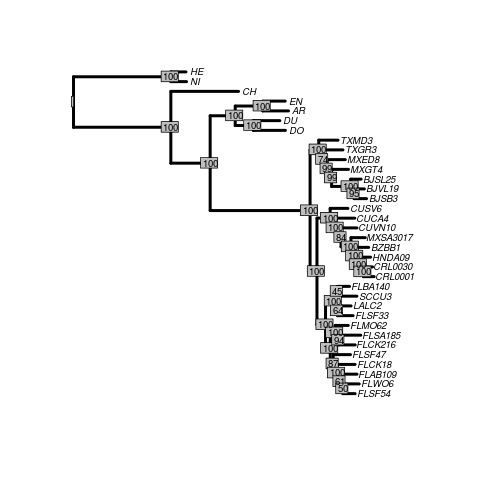

In [21]:
%%R
## save figure
svg("figures/tree_virentes_m20p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.virentes_m20p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
tre = read.tree("analysis_raxml/RAxML_bipartitions.virentes_m20p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

In [22]:
%%R -n
svg("figures/cladogram.svg", height=9, width=3)
plot(ladderize(tre), edge.width=3, cex=0.75, adj=0.1, use.edge.length=F)
dev.off()

png 
  2 


In [23]:
%%R -w 300
svg("figures/ingrouptree.svg", height=9, width=3)
tre <-  drop.tip(tre, c("HE","NI","CH","DU","DO","AR","EN"))
tre <- ladderize(tre)
tre <- rotate(tre,28)
tre <- rotate(tre,29)
tre <- rotate(tre,30)
plot(tre, edge.width=4, cex=0.75, adj=0.1)
dev.off()

png 
  2 


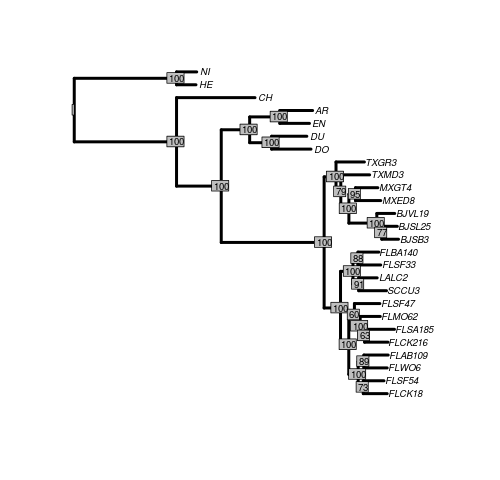

In [24]:
%%R -w 500
## save figure
svg("figures/tree_FBMGV_m4p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.FBMGV_m4p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

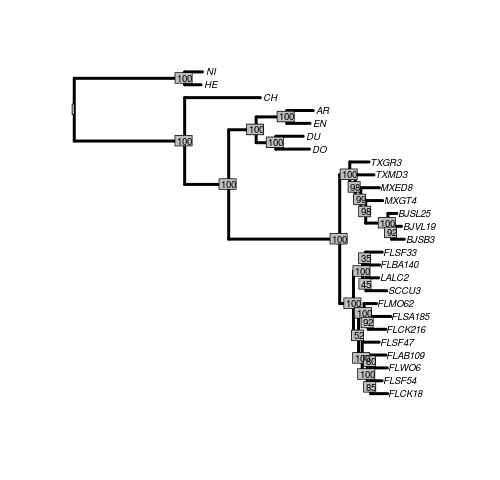

In [25]:
%%R -w 500
## save figure
svg("figures/tree_FBMGV_m20p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.FBMGV_m20p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

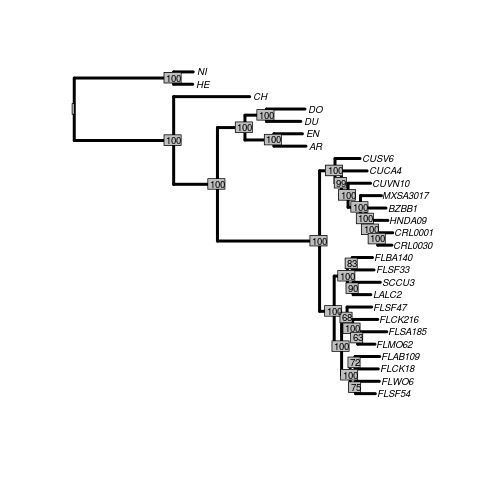

In [26]:
%%R -w 500
## save figure
svg("figures/tree_OSMGV_m4p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.OSMGV_m4p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

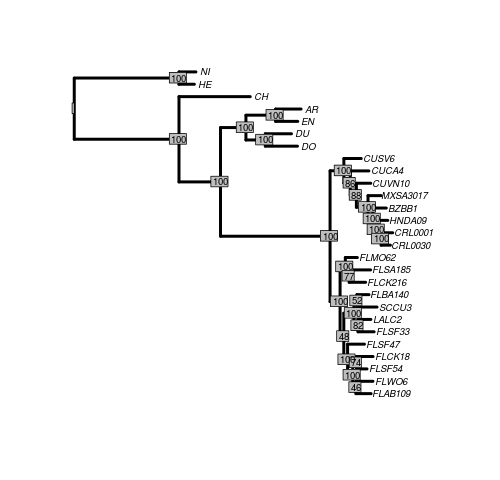

In [27]:
%%R -w 500
## save figure
svg("figures/tree_OSMGV_m20p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.OSMGV_m20p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

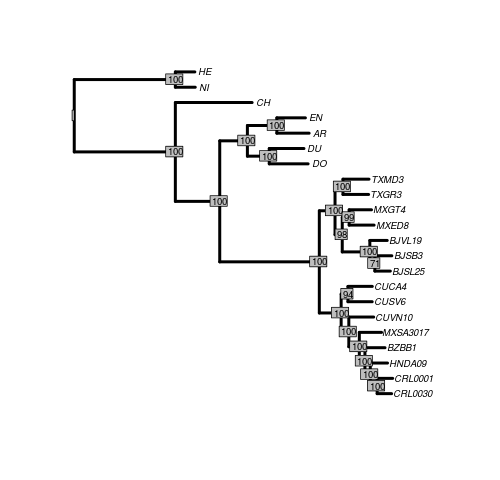

In [28]:
%%R -w 500
## save figure
svg("figures/tree_FBOS_m4p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.FBOS_m4p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

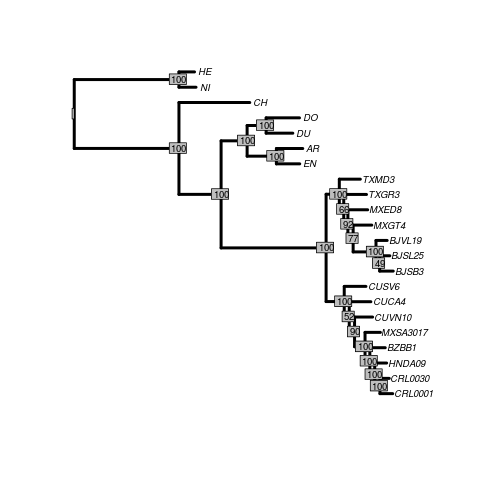

In [29]:
%%R -w 500
## save figure
svg("figures/tree_FBOS_m16p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.FBOS_m16p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

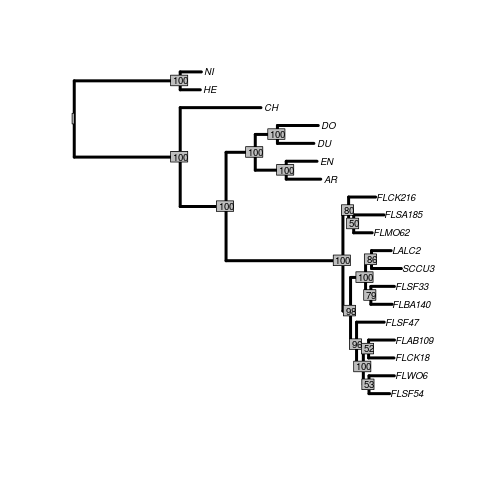

In [30]:
%%R -w 500
## save figure
svg("figures/tree_MGV_m4p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.MGV_m4p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

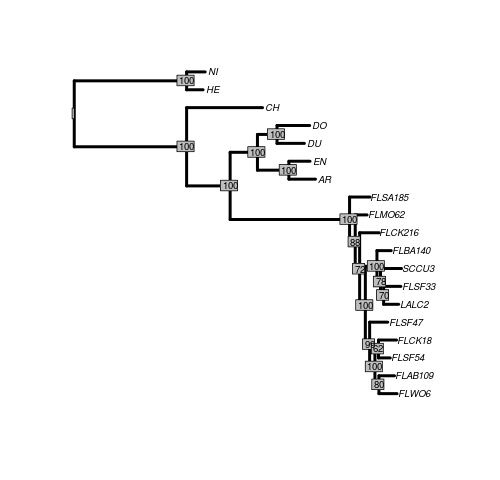

In [31]:
%%R -w 500
## save figure
svg("figures/tree_MGV_m16p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.MGV_m16p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

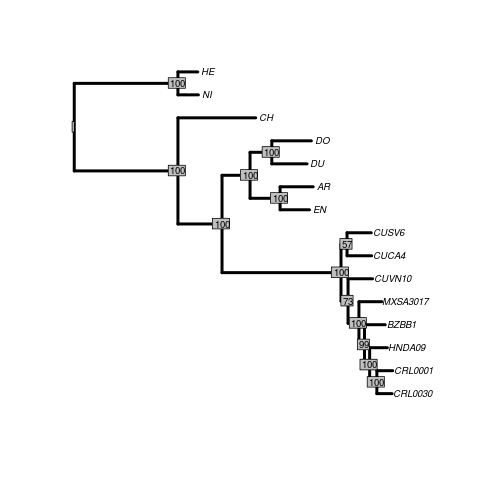

In [32]:
%%R -w 500
## save figure
svg("figures/tree_OS_m4p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.OS_m4p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

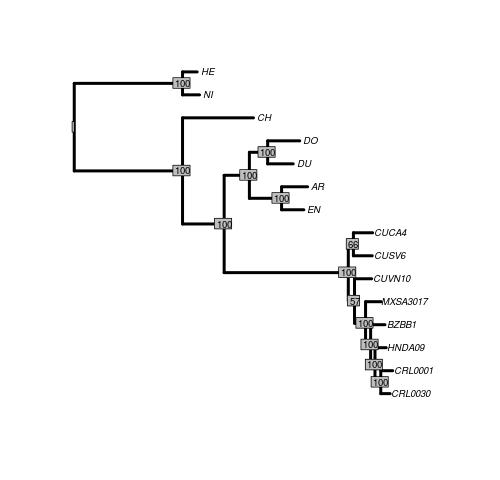

In [33]:
%%R -w 500
## save figure
svg("figures/tree_OS_m13p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.OS_m13p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

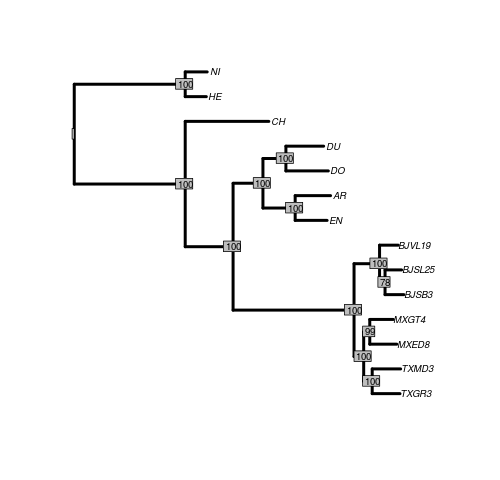

In [34]:
%%R -w 500
## save figure
svg("figures/tree_FB_m4p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.FB_m4p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)

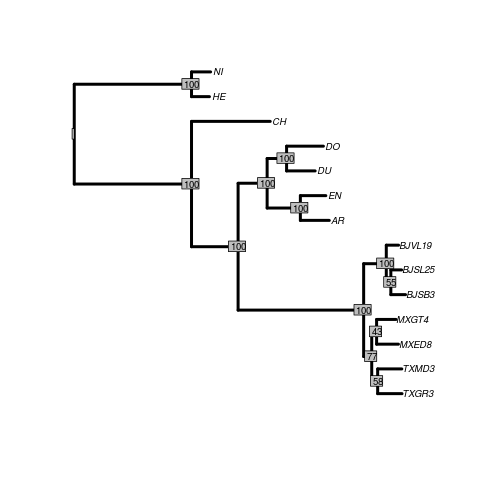

In [35]:
%%R -w 500
## save figure
svg("figures/tree_FB_m12p5.svg",height=8, width=6)
tre = read.tree("analysis_raxml/RAxML_bipartitions.FB_m12p5")
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)
dev.off()

## show figure
plot(ladderize(tre), edge.width=4, cex=0.8, adj=0.1)
nodelabels(tre$node.label, bg='grey', cex=0.8)